# Airline Passenger Satisfaction

## Table of Contents

- Data Features
- Importing Libraries
- Reading the Data
- Statistical Information and General Information about the Data
- EDA
- Data Preprocessing
- Model Building
- Model Evaluation

## Data Features

Gender: Gender of the passengers (Female, Male)

Customer Type: The customer type (Loyal customer, disloyal customer)

Age: The actual age of the passengers

Type of Travel: Purpose of the flight of the passengers (Personal Travel, Business Travel)

Class: Travel class in the plane of the passengers (Business, Eco, Eco Plus)

Flight distance: The flight distance of this journey

Inflight wifi service: Satisfaction level of the inflight wifi service (0:Not Applicable;1-5)

Departure/Arrival time convenient: Satisfaction level of Departure/Arrival time convenient

Ease of Online booking: Satisfaction level of online booking

Gate location: Satisfaction level of Gate location

Food and drink: Satisfaction level of Food and drink

Online boarding: Satisfaction level of online boarding

Seat comfort: Satisfaction level of Seat comfort

Inflight entertainment: Satisfaction level of inflight entertainment

On-board service: Satisfaction level of On-board service

Leg room service: Satisfaction level of Leg room service

Baggage handling: Satisfaction level of baggage handling

Check-in service: Satisfaction level of Check-in service

Inflight service: Satisfaction level of inflight service

Cleanliness: Satisfaction level of Cleanliness

Departure Delay in Minutes: Minutes delayed when departure

Arrival Delay in Minutes: Minutes delayed when Arrival

Satisfaction: Airline satisfaction level(Satisfaction, neutral or dissatisfaction)

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

# For data modeling
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

# For metrics and helpful functions
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
pd.set_option('display.max_columns', None)

### Reading the Data

In [3]:
x = pd.read_csv('airline passenger satisfaction train.csv')
y = pd.read_csv('airline passenger satisfaction test.csv')

df = pd.concat([x,y], ignore_index = True)

Dikarenakan datasetnya sudah terbagi diawal menjadi data train dan test, untuk ekplorasi data analis, saya menggabungan data train dan test dengan menggunakan fungsi concat().

### Statistical Information and General Information about the Data

In [4]:
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied


In [5]:
df.shape

(129880, 25)

In [6]:
df.describe()

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000
mean,44158.700000,64940.500000,39.427957,1190.316392,2.728696,3.057599,2.756876,2.976925,3.204774,3.252633,3.441361,3.358077,3.383023,3.350878,3.632114,3.306267,3.642193,3.286326,14.713713,15.091129
std,31207.377062,37493.270818,15.119360,997.452477,1.329340,1.526741,1.401740,1.278520,1.329933,1.350719,1.319289,1.334049,1.287099,1.316252,1.180025,1.266185,1.176669,1.313682,38.071126,38.465650
min,0.000000,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16234.750000,32470.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,38963.500000,64940.500000,40.000000,844.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,71433.250000,97410.250000,51.000000,1744.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,103903.000000,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [7]:
df['id'].nunique()

129880

Bisa diartikan bahwa kolom id atau customer id tidak ada yang duplikat, maka dari itu dari keseluruhan dataset ini ada 129.880 customer yang tercatat.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         129880 non-null  int64  
 1   id                                 129880 non-null  int64  
 2   Gender                             129880 non-null  object 
 3   Customer Type                      129880 non-null  object 
 4   Age                                129880 non-null  int64  
 5   Type of Travel                     129880 non-null  object 
 6   Class                              129880 non-null  object 
 7   Flight Distance                    129880 non-null  int64  
 8   Inflight wifi service              129880 non-null  int64  
 9   Departure/Arrival time convenient  129880 non-null  int64  
 10  Ease of Online booking             129880 non-null  int64  
 11  Gate location                      1298

In [9]:
df.isnull().sum()

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
satisfaction    

In [10]:
df.duplicated().sum()

0

### EDA

#### Fill the mising value

In [11]:
df.fillna(df['Arrival Delay in Minutes'].mean(), inplace = True)

Saya mengisi nilai yang hilang/missing value dengan menggunakan fungsi mean() atau rata-rata nilai dari kolom tersebut. Dikarenakan yang missing value ada pada kolom "Arrival Delay In Minutes", menurut saya masih masuk akal jika missing value diisi dengan fungsi mean().

In [12]:
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied


In [13]:
df.drop('Unnamed: 0', axis = 1, inplace = True)

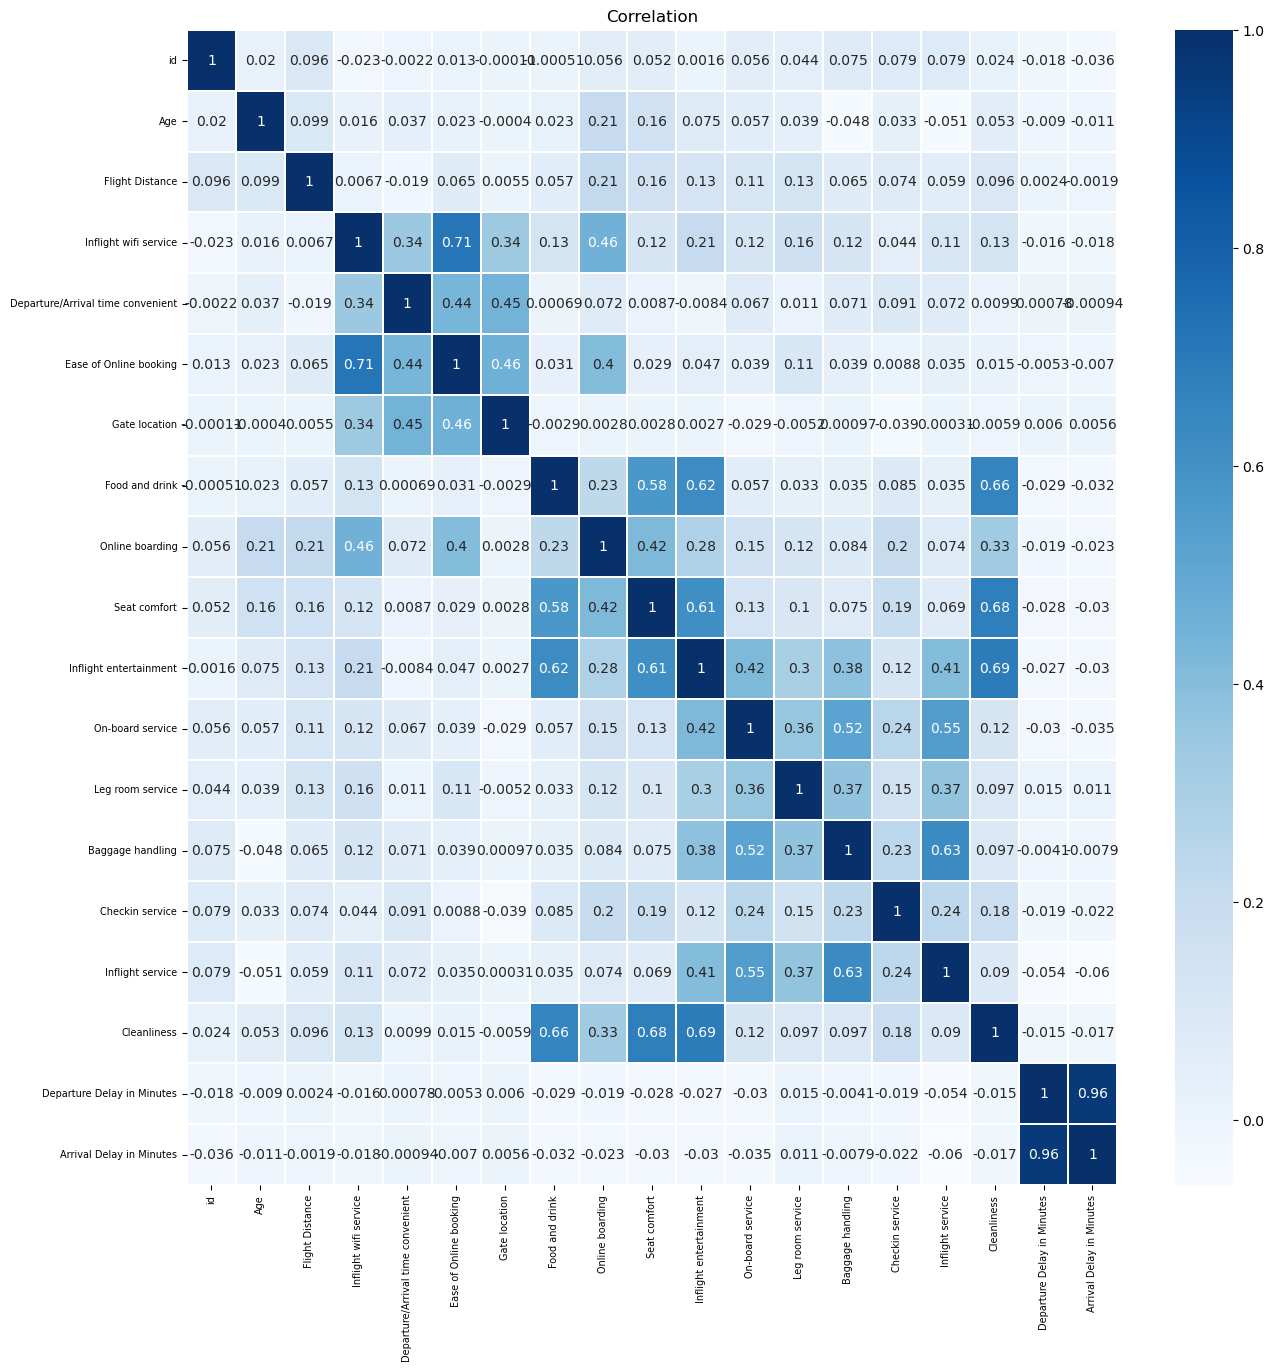

In [14]:
df_corr = df.corr()
plt.figure(figsize = (15,15))
sns.heatmap(df_corr, annot = True, linewidth = 0.3, cmap = 'Blues')
plt.title("Correlation")
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
plt.show()

Korelasi antar fitur : 
- 96% = Arrival Delay In Minutes + Departure Delay In Minutes
- 71% = Ease of Online Booking + Inflight Wifi Service
- 69% = Cleanliness + Inflight Entertainment
- 68% = Cleanliness + Seat Comfort
- 66% = Cleanliness + Food and Drink
- 63% = Inflight service + baggage handling
- 62% = Inflight entertainment + food and drink
- 61% = Inflight entertainment + seat comfort
- 58% = Seat comfort + food and drink
- 55% = Inflight service + On-board Service
- 52% = Baggage handling + On-board Service
- 46% = Gate location + ease of online booking

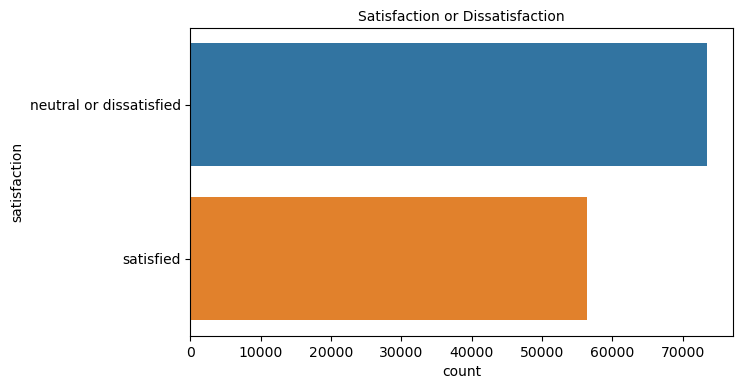

In [15]:
plt.figure(figsize = (7, 4))
sns.countplot(data = df, y = 'satisfaction', order = df['satisfaction'].value_counts().index)
plt.title("Satisfaction or Dissatisfaction", loc = 'center', pad = 5, fontsize = 10)
plt.show()

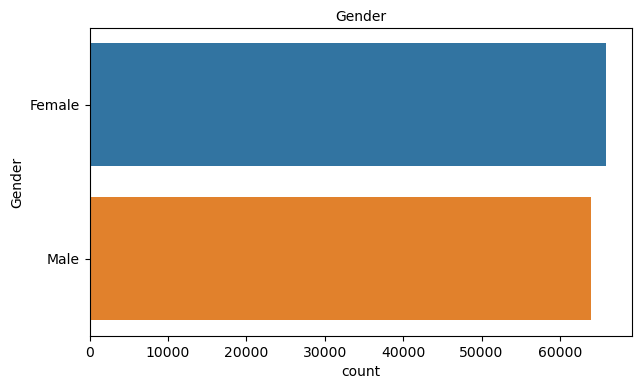

In [16]:
plt.figure(figsize = (7, 4))
sns.countplot(data = df, y = 'Gender', order = df['Gender'].value_counts().index)
plt.title("Gender", loc = 'center', pad = 5, fontsize = 10)
plt.show()

Dibawah ini kita akan melihat distribusi dari kedua fitur yang memiliki korelasi diatas 50%, dan memfilter distribusi tersebut dengan kolom class/target 'satisfaction' : 
- 96% = Arrival Delay In Minutes + Departure Delay In Minutes
- 71% = Ease of Online Booking + Inflight Wifi Service
- 69% = Cleanliness + Inflight Entertainment
- 68% = Cleanliness + Seat Comfort
- 66% = Cleanliness + Food and Drink
- 63% = Inflight service + baggage handling
- 62% = Inflight entertainment + food and drink
- 61% = Inflight entertainment + seat comfort
- 58% = Seat comfort + food and drink
- 55% = Inflight service + On-board Service
- 52% = Baggage handling + On-board Service
- 46% = Gate location + ease of online booking

In [17]:
numerical = df.select_dtypes(include=['int64', 'float64'])
categorical = df.select_dtypes(include=['object'])

print(f'numerical features: {numerical.columns.to_list()}')
print(f'categorical features: {categorical.columns.to_list()}')

numerical features: ['id', 'Age', 'Flight Distance', 'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']
categorical features: ['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction']


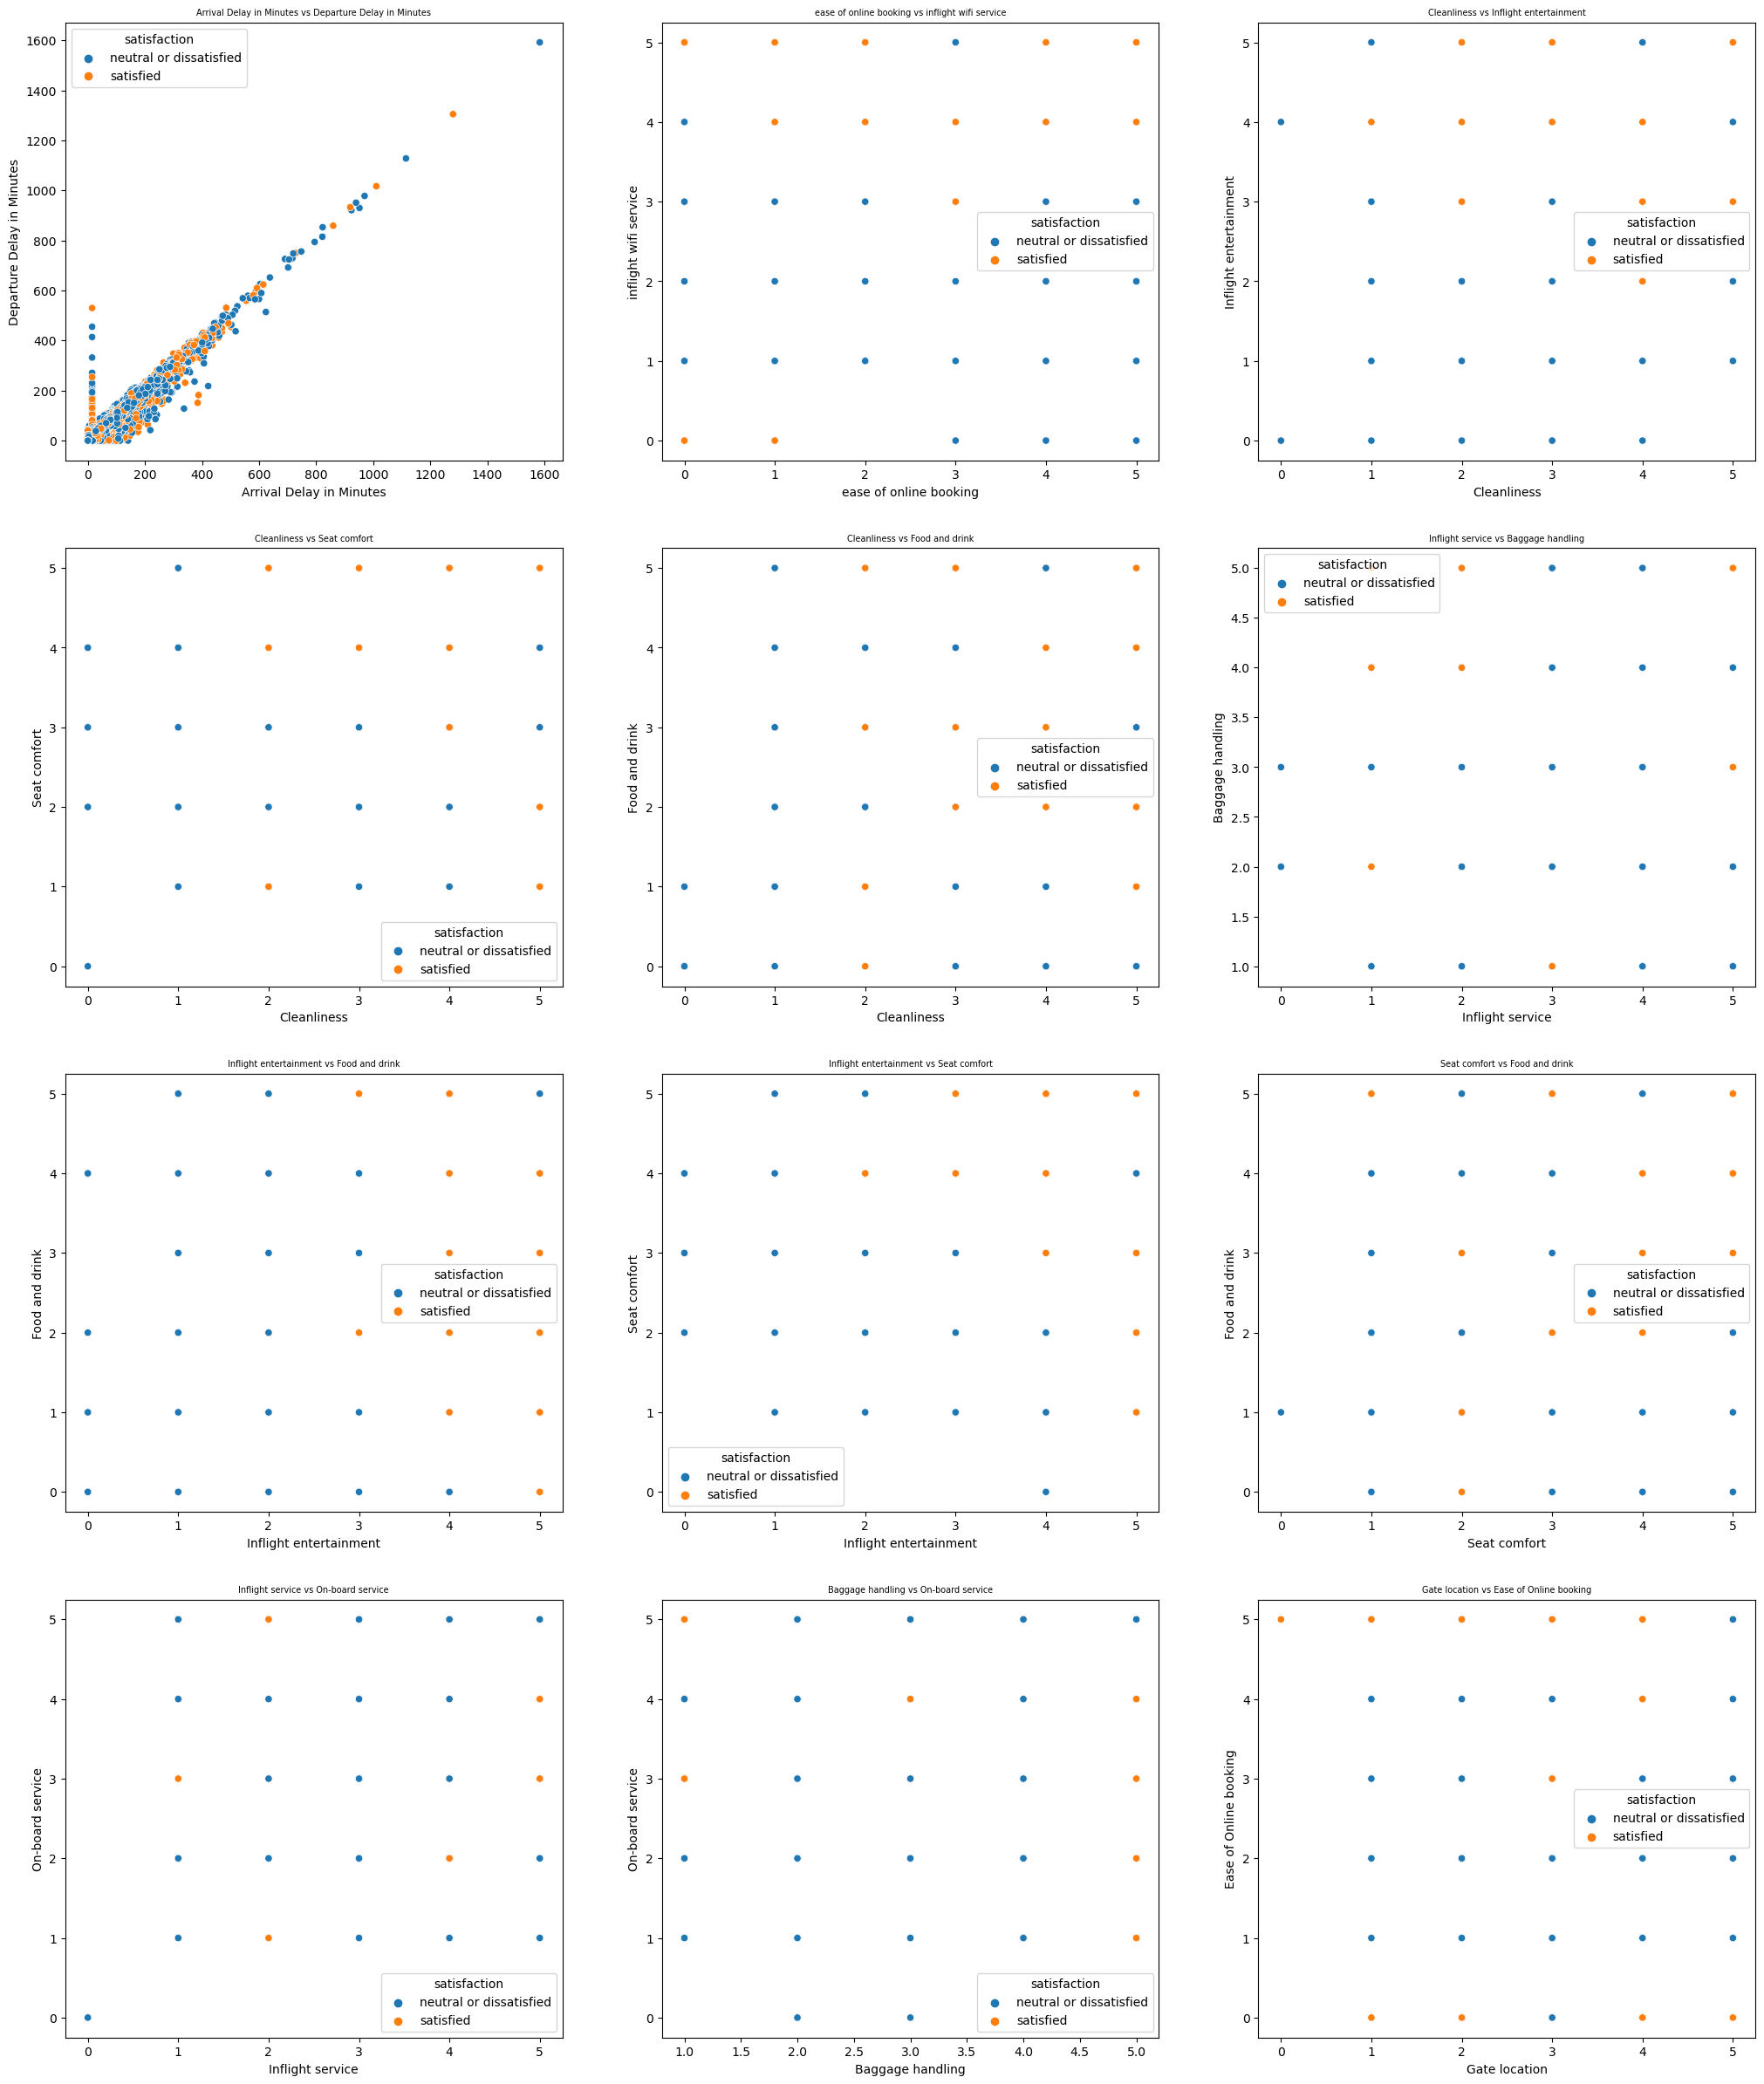

In [18]:
fig, ax = plt.subplots(4, 3, figsize = (25, 30))
sns.scatterplot(data = df, x = 'Arrival Delay in Minutes', y = 'Departure Delay in Minutes', hue = 'satisfaction', ax = ax [0][0])
ax[0][0].set_xlabel("Arrival Delay in Minutes")
ax[0][0].set_ylabel("Departure Delay in Minutes")
ax[0][0].set_title("Arrival Delay in Minutes vs Departure Delay in Minutes",fontsize = 7)

sns.scatterplot(data = df, x = 'Ease of Online booking', y = 'Inflight wifi service', hue = 'satisfaction', ax = ax [0][1])
ax[0][1].set_xlabel("ease of online booking")
ax[0][1].set_ylabel("inflight wifi service")
ax[0][1].set_title("ease of online booking vs inflight wifi service",fontsize = 7)

sns.scatterplot(data = df, x = 'Cleanliness', y = 'Inflight entertainment', hue = 'satisfaction', ax = ax [0][2])
ax[0][2].set_xlabel("Cleanliness")
ax[0][2].set_ylabel("Inflight entertainment")
ax[0][2].set_title("Cleanliness vs Inflight entertainment",fontsize = 7)

sns.scatterplot(data = df, x = 'Cleanliness', y = 'Seat comfort', hue = 'satisfaction', ax = ax [1][0])
ax[1][0].set_xlabel("Cleanliness")
ax[1][0].set_ylabel("Seat comfort")
ax[1][0].set_title("Cleanliness vs Seat comfort",fontsize = 7)

sns.scatterplot(data = df, x = 'Cleanliness', y = 'Food and drink', hue = 'satisfaction', ax = ax [1][1])
ax[1][1].set_xlabel("Cleanliness")
ax[1][1].set_ylabel("Food and drink")
ax[1][1].set_title("Cleanliness vs Food and drink",fontsize = 7)

sns.scatterplot(data = df, x = 'Inflight service', y = 'Baggage handling', hue = 'satisfaction', ax = ax [1][2])
ax[1][2].set_xlabel("Inflight service")
ax[1][2].set_ylabel("Baggage handling")
ax[1][2].set_title("Inflight service vs Baggage handling",fontsize = 7)

sns.scatterplot(data = df, x = 'Inflight entertainment', y = 'Food and drink', hue = 'satisfaction', ax = ax [2][0])
ax[2][0].set_xlabel("Inflight entertainment")
ax[2][0].set_ylabel("Food and drink")
ax[2][0].set_title("Inflight entertainment vs Food and drink",fontsize = 7)

sns.scatterplot(data = df, x = 'Inflight entertainment', y = 'Seat comfort', hue = 'satisfaction', ax = ax [2][1])
ax[2][1].set_xlabel("Inflight entertainment")
ax[2][1].set_ylabel("Seat comfort")
ax[2][1].set_title("Inflight entertainment vs Seat comfort",fontsize = 7)

sns.scatterplot(data = df, x = 'Seat comfort', y = 'Food and drink', hue = 'satisfaction', ax = ax [2][2])
ax[2][2].set_xlabel("Seat comfort")
ax[2][2].set_ylabel("Food and drink")
ax[2][2].set_title("Seat comfort vs Food and drink",fontsize = 7)

sns.scatterplot(data = df, x = 'Inflight service', y = 'On-board service', hue = 'satisfaction', ax = ax [3][0])
ax[3][0].set_xlabel("Inflight service")
ax[3][0].set_ylabel("On-board service")
ax[3][0].set_title("Inflight service vs On-board service",fontsize = 7)

sns.scatterplot(data = df, x = 'Baggage handling', y = 'On-board service', hue = 'satisfaction', ax = ax [3][1])
ax[3][1].set_xlabel("Baggage handling")
ax[3][1].set_ylabel("On-board service")
ax[3][1].set_title("Baggage handling vs On-board service",fontsize = 7)

sns.scatterplot(data = df, x = 'Gate location', y = 'Ease of Online booking', hue = 'satisfaction', ax = ax [3][2])
ax[3][2].set_xlabel("Gate location")
ax[3][2].set_ylabel("Ease of Online booking")
ax[3][2].set_title("Gate location vs Ease of Online booking",fontsize = 7)
plt.show()

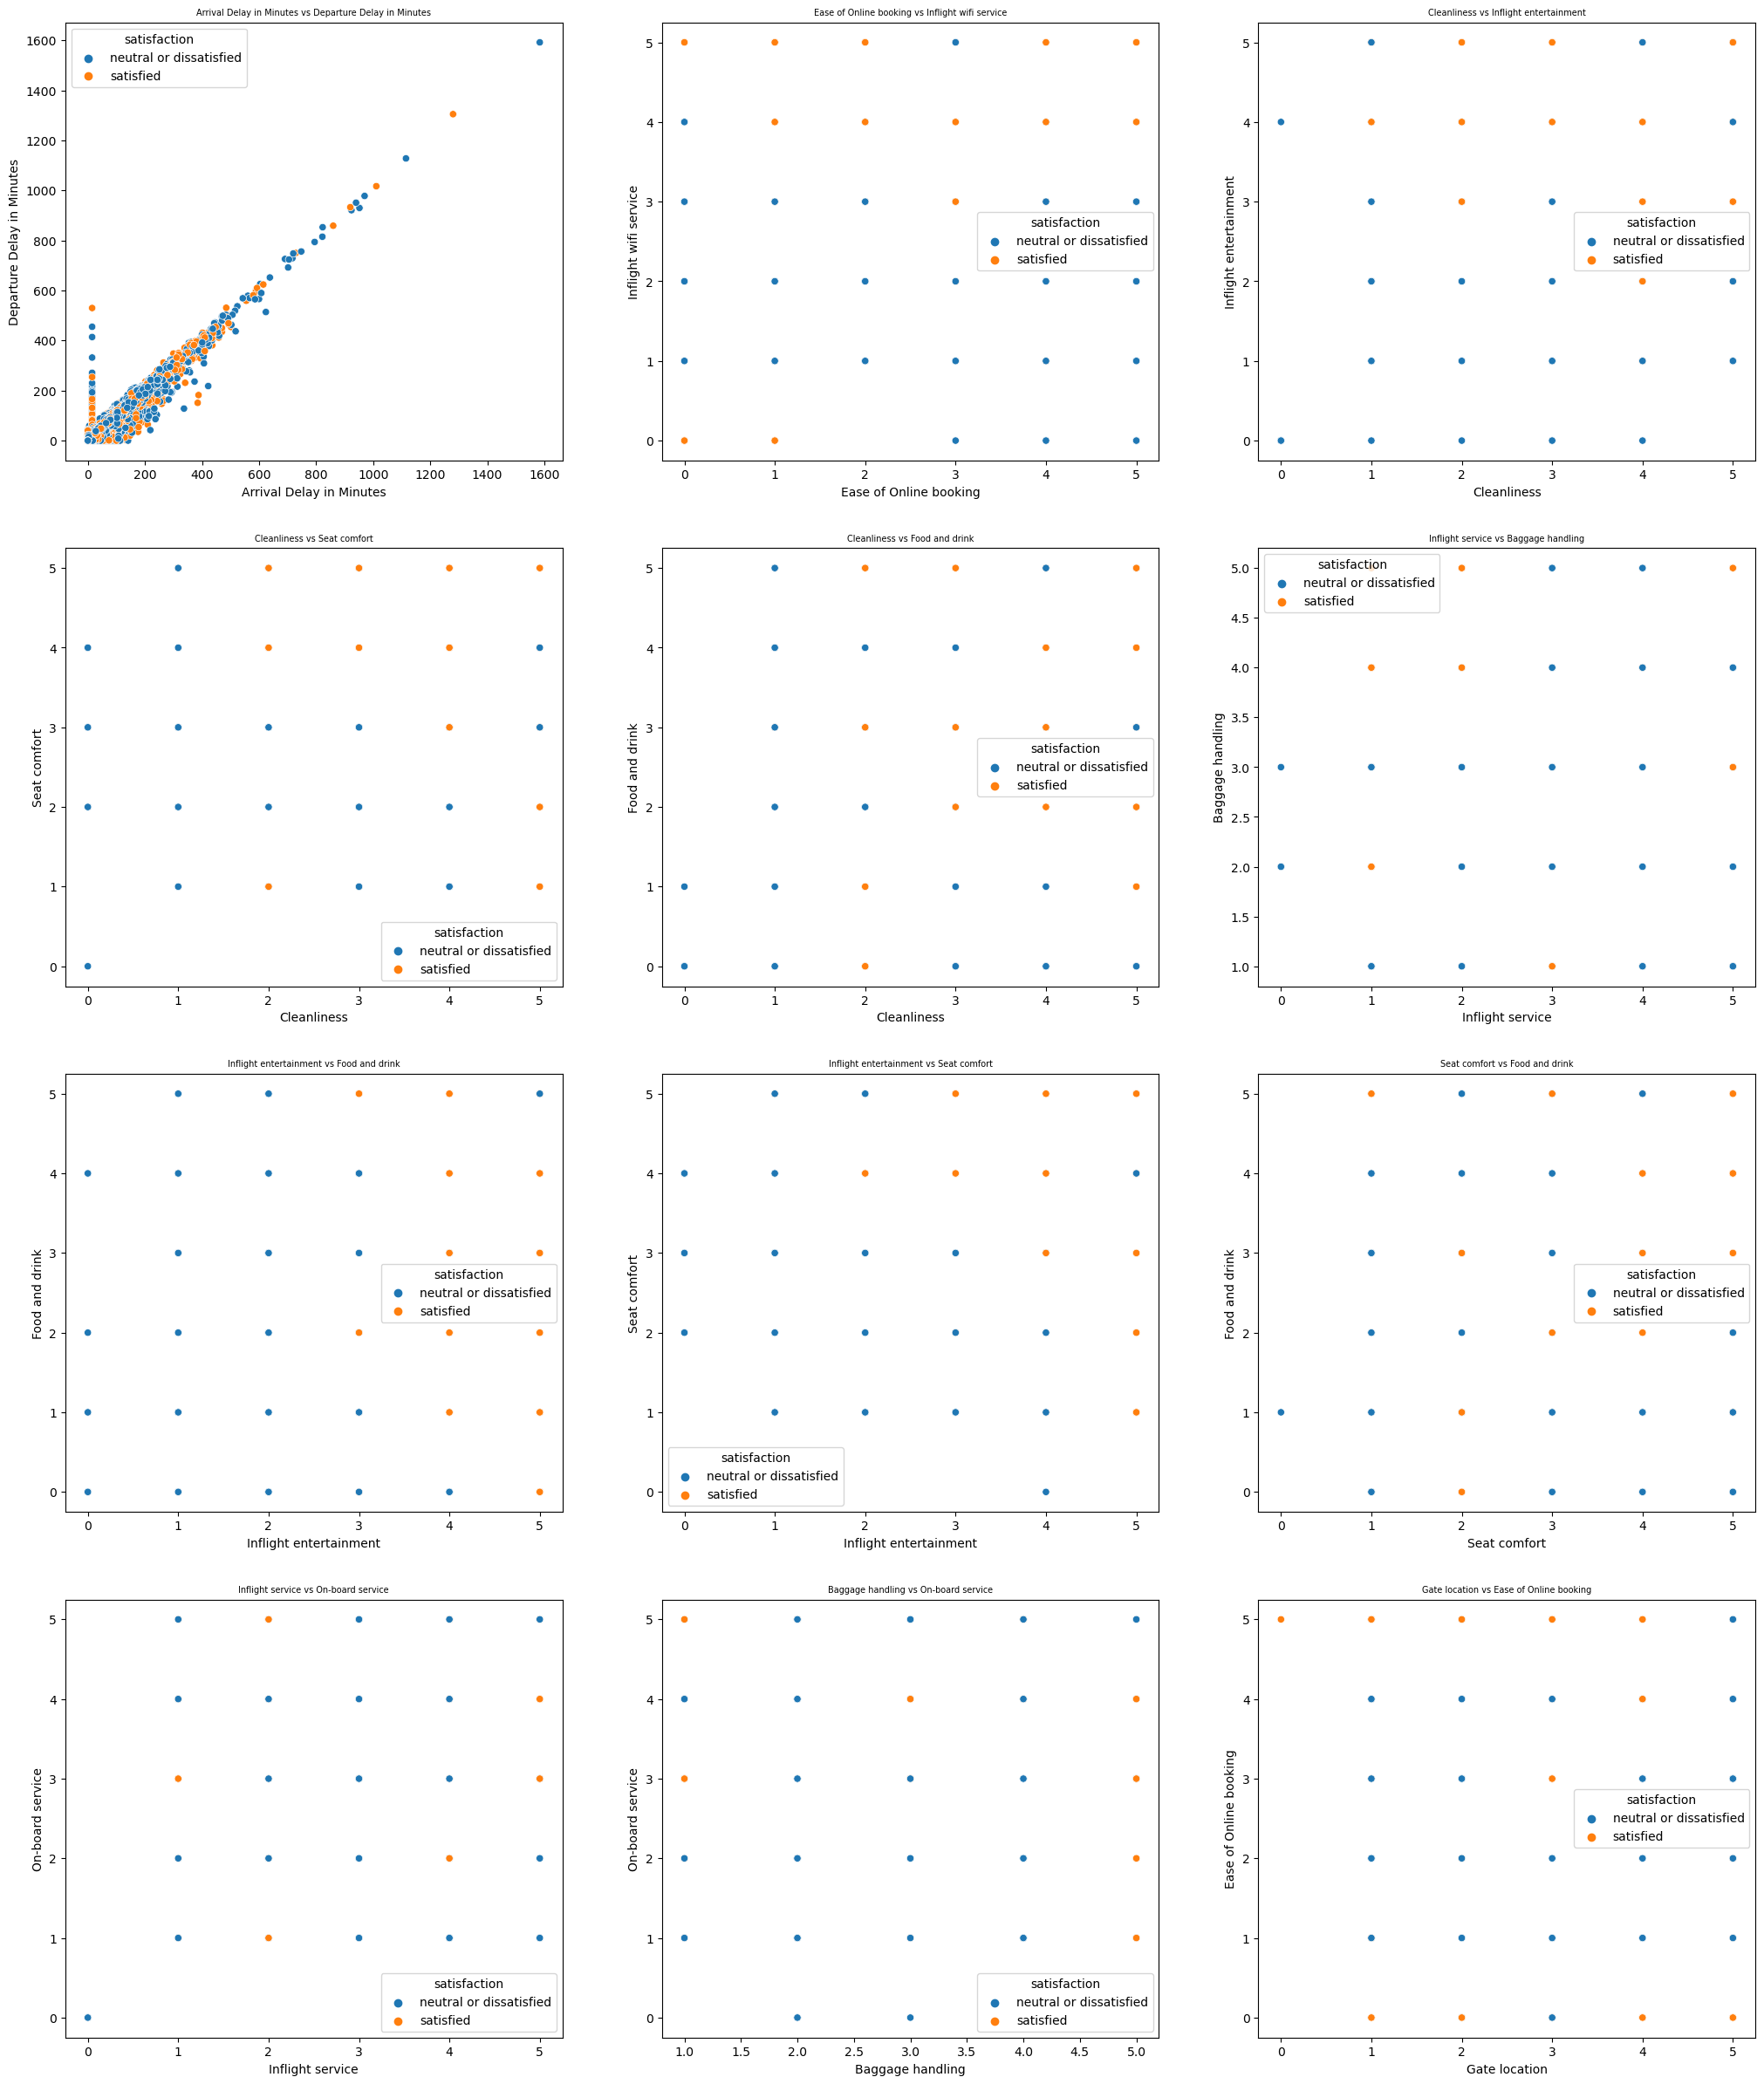

In [36]:
features = [
    ('Arrival Delay in Minutes', 'Departure Delay in Minutes', 'Arrival Delay in Minutes vs Departure Delay in Minutes'),
    ('Ease of Online booking', 'Inflight wifi service', 'Ease of Online booking vs Inflight wifi service'),
    ('Cleanliness', 'Inflight entertainment', 'Cleanliness vs Inflight entertainment'),
    ('Cleanliness', 'Seat comfort', 'Cleanliness vs Seat comfort'),
    ('Cleanliness', 'Food and drink', 'Cleanliness vs Food and drink'),
    ('Inflight service', 'Baggage handling', 'Inflight service vs Baggage handling'),
    ('Inflight entertainment', 'Food and drink', 'Inflight entertainment vs Food and drink'),
    ('Inflight entertainment', 'Seat comfort', 'Inflight entertainment vs Seat comfort'),
    ('Seat comfort', 'Food and drink', 'Seat comfort vs Food and drink'),
    ('Inflight service', 'On-board service', 'Inflight service vs On-board service'),
    ('Baggage handling', 'On-board service', 'Baggage handling vs On-board service'),
    ('Gate location', 'Ease of Online booking', 'Gate location vs Ease of Online booking')
]

# Membuat subplots
fig, ax = plt.subplots(4, 3, figsize=(25, 30))

# Loop untuk membuat scatter plot
for i, (x_feature, y_feature, title) in enumerate(features):
    row = i // 3
    col = i % 3
    sns.scatterplot(data=df, x=x_feature, y=y_feature, hue='satisfaction', ax=ax[row][col])
    ax[row][col].set_xlabel(x_feature)
    ax[row][col].set_ylabel(y_feature)
    ax[row][col].set_title(title, fontsize=7)

# Menampilkan plot
plt.show()

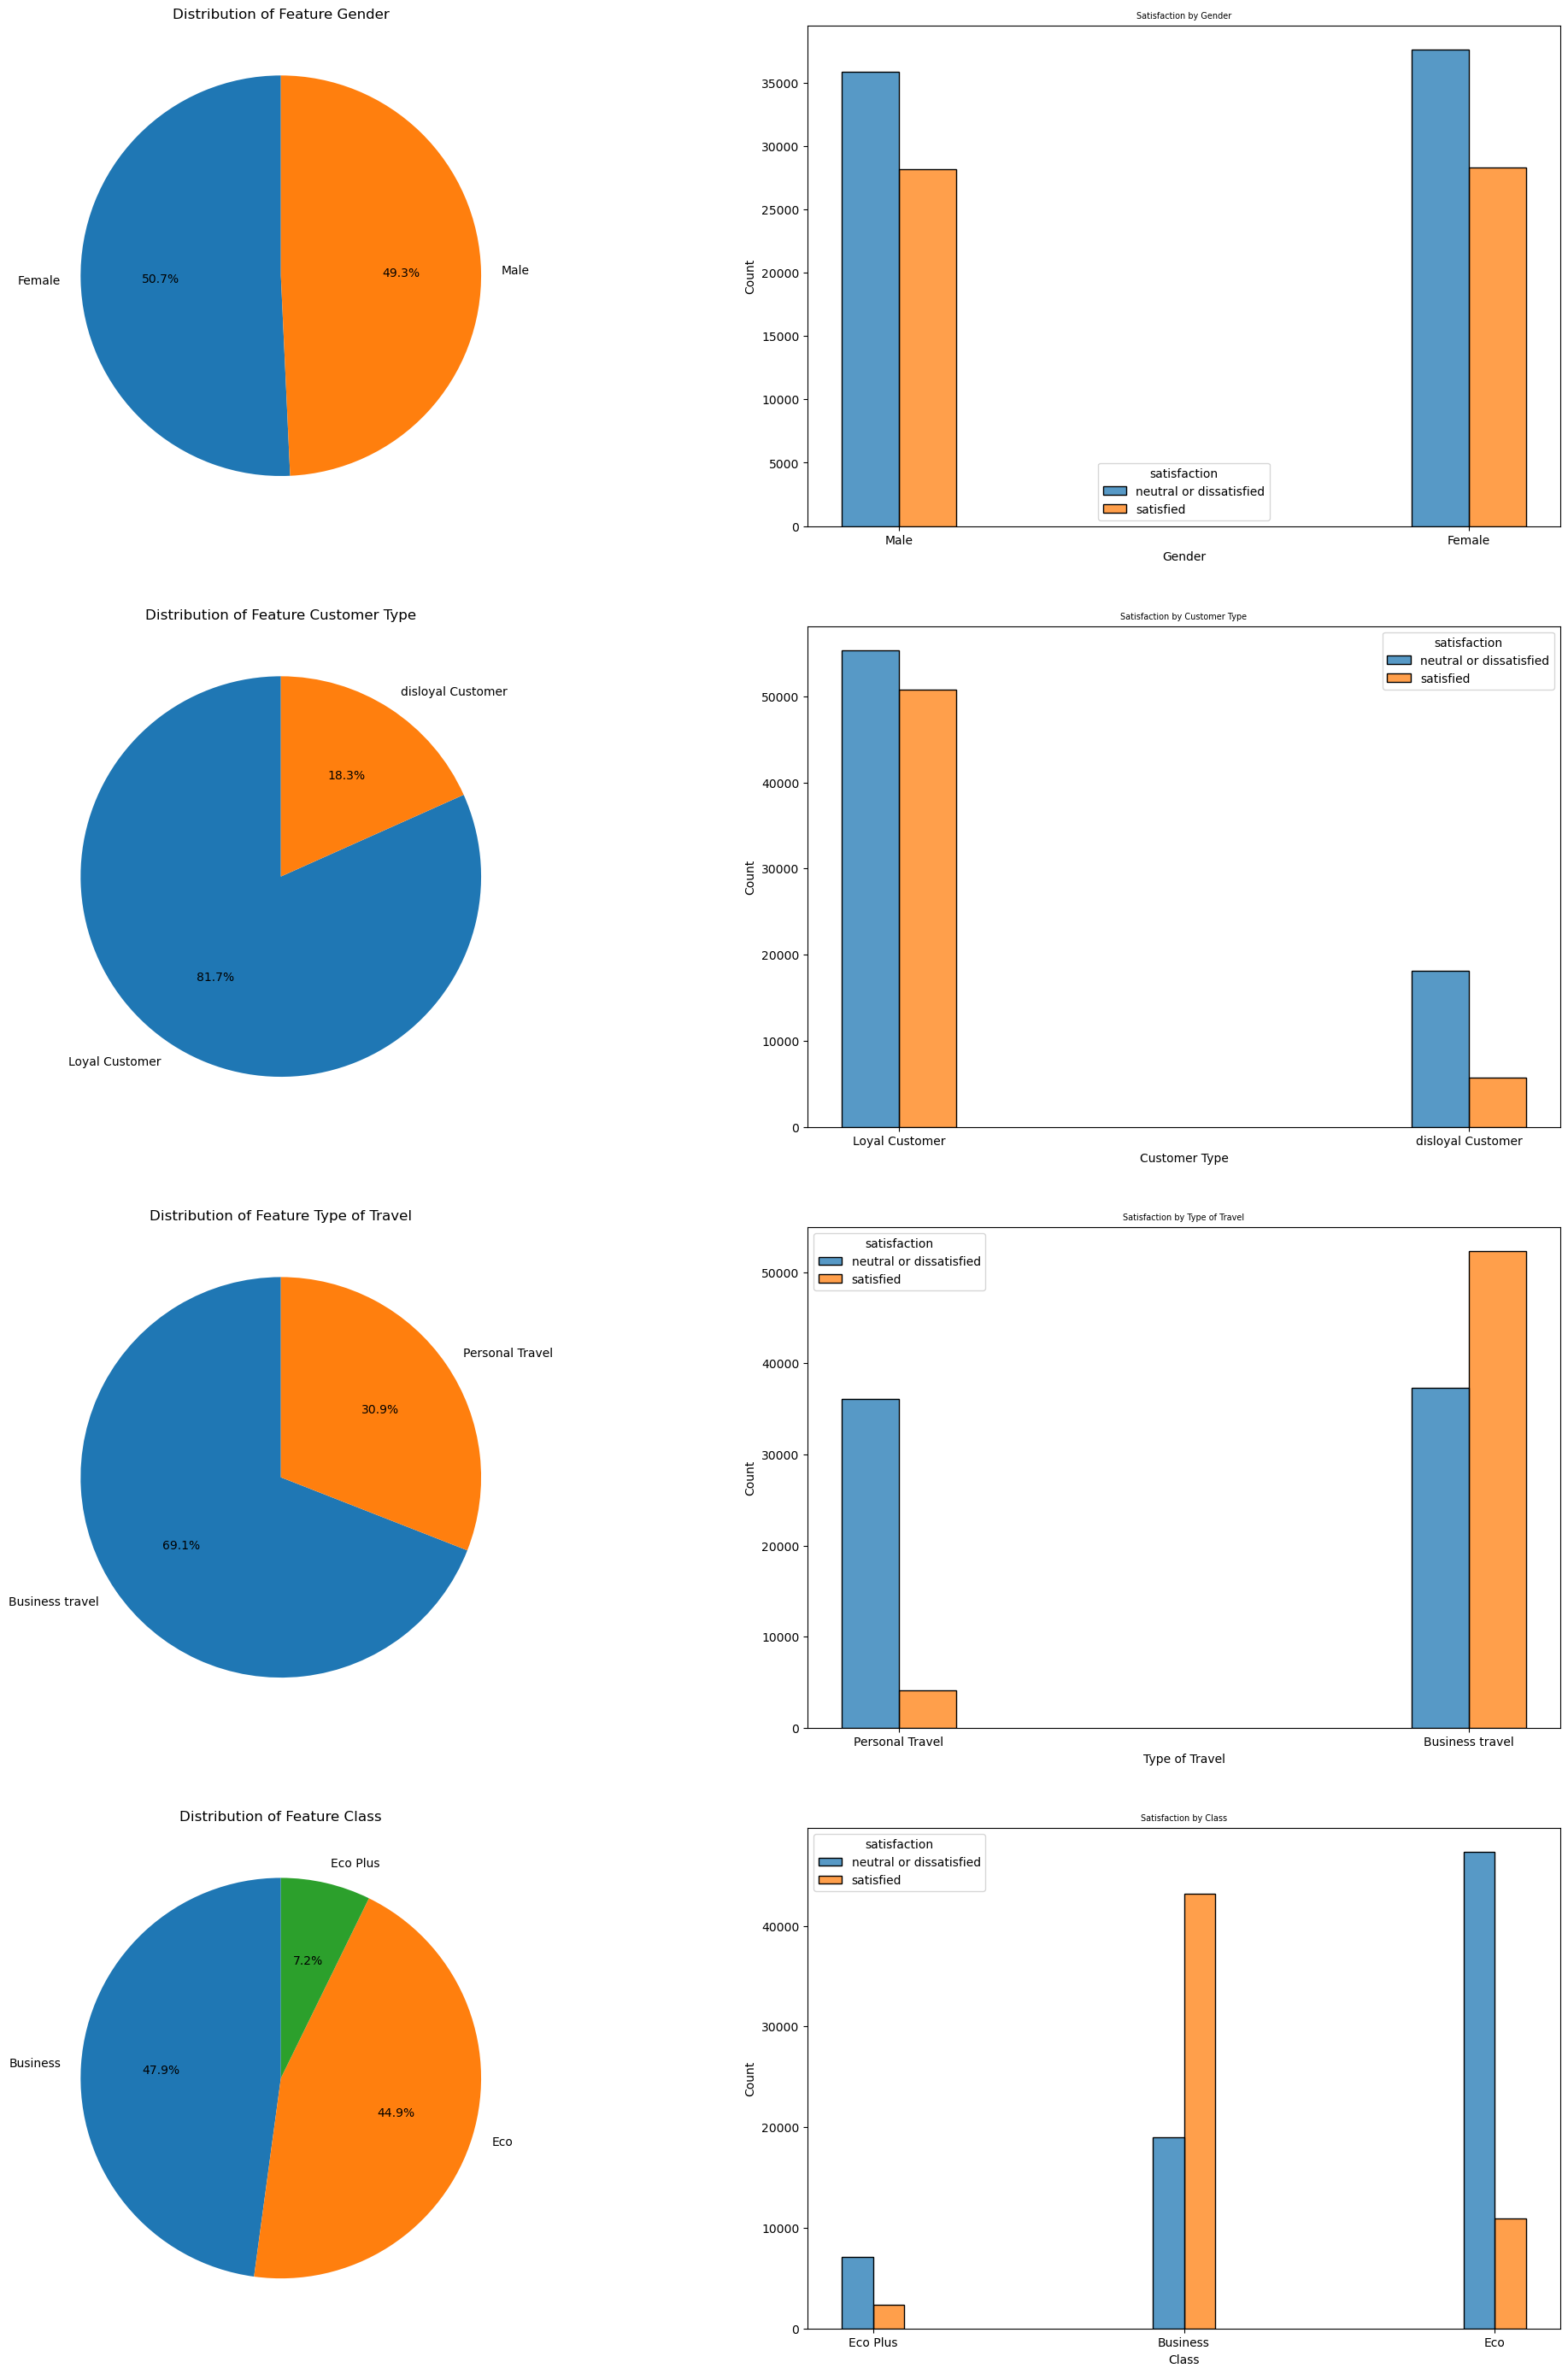

In [19]:
fitur_kategorikal = ['Gender', 'Customer Type', 'Type of Travel', 'Class']

fig, ax = plt.subplots(4, 2, figsize = (25, 35))
for i, feature in enumerate (fitur_kategorikal):
    area = df[feature].value_counts()
    index = area.index
    value = area.values
    
    area2 = df.groupby([feature])['satisfaction'].value_counts()
    index2 = area2.index
    value2 = area2.values
    
    ax[i][0].pie(value, labels=index, autopct='%1.1f%%', startangle=90)
    sns.histplot(data = df, x = feature, hue = 'satisfaction', multiple = 'dodge', shrink = 0.2, ax = ax[i][1])
    
    ax[i][0].set_title("Distribution of Feature {}".format(feature), loc = 'center')
    ax[i][1].set_title(f"Satisfaction by {feature}", fontsize = 7)
plt.show()

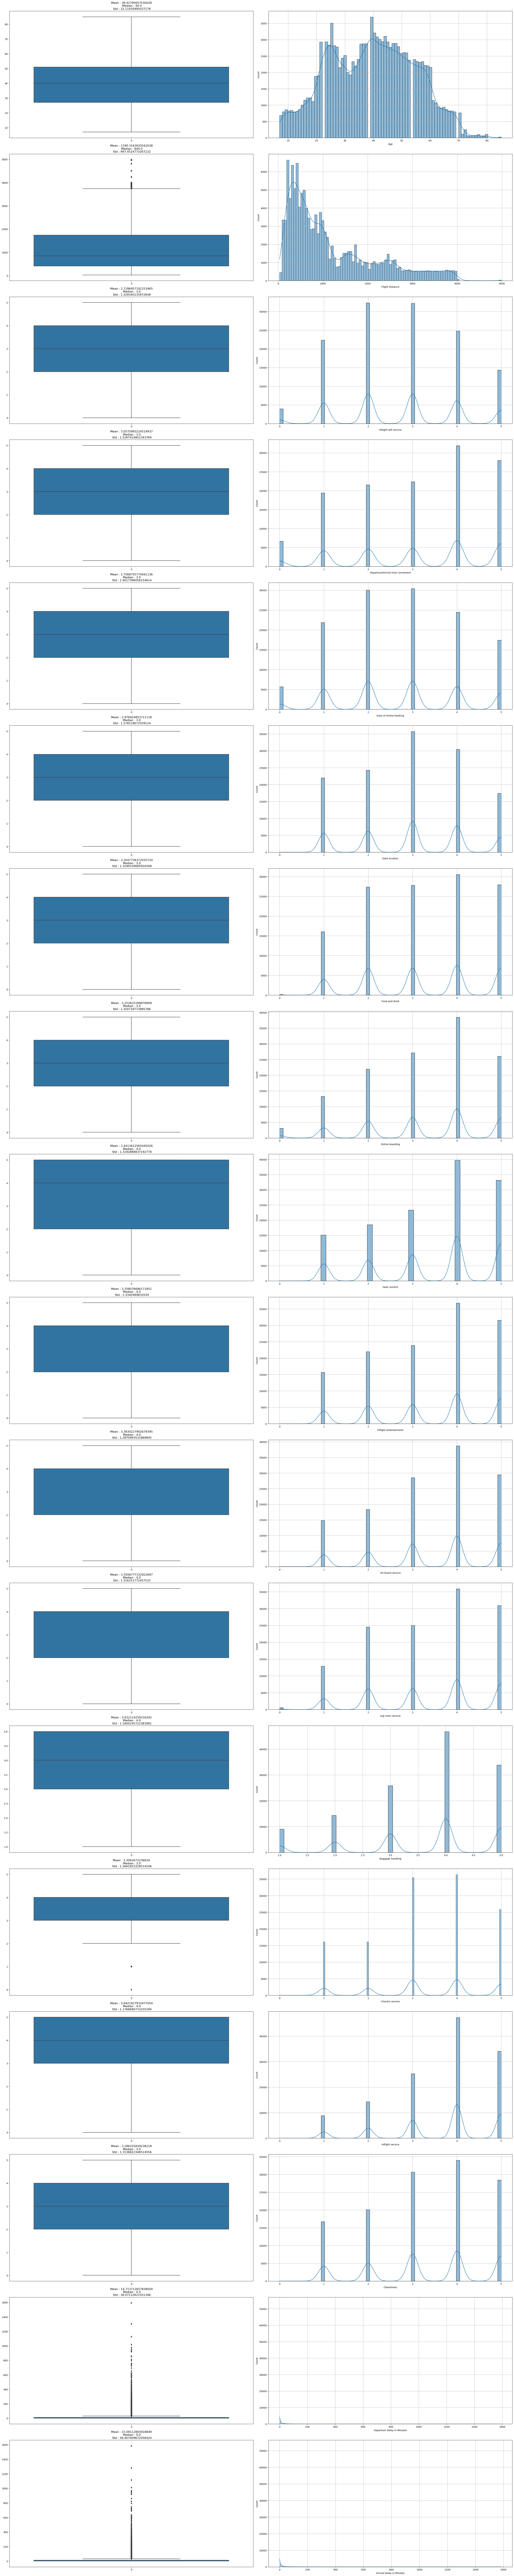

In [20]:
numerikal = ['Age', 'Flight Distance', 'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 
             'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 
             'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 
             'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']

fig, ax = plt.subplots(18, 2, figsize = (30, 150))
for i, col in enumerate(numerikal):
    sns.boxplot(df[col], ax=ax[i][0])
    sns.histplot(df[col], ax=ax[i][1], kde = True)
    ax[i][0].set_title("Mean : {}\n Median : {}\n Std : {}".format(df[col].mean(),
                                                                  df[col].median(),
                                                                  df[col].std()))
    ax[i][1].grid(True)
plt.tight_layout()
plt.show()

Disini saya tidak melakukan penghapusan outliers, karena segala sesuatu dari tiap fitur adalah karakteristik masing-masing customer experience yang telah tercatat.

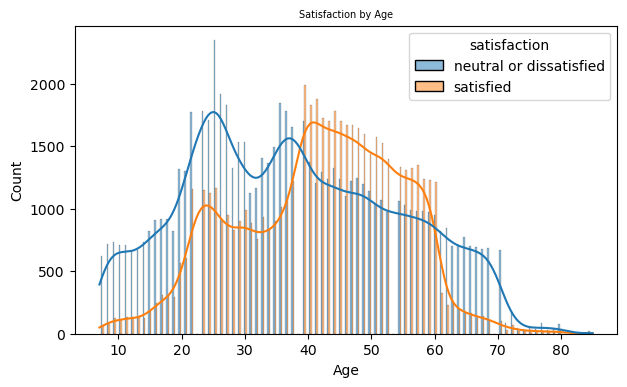

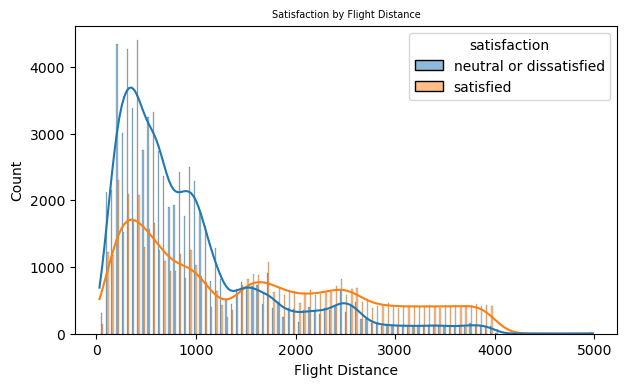

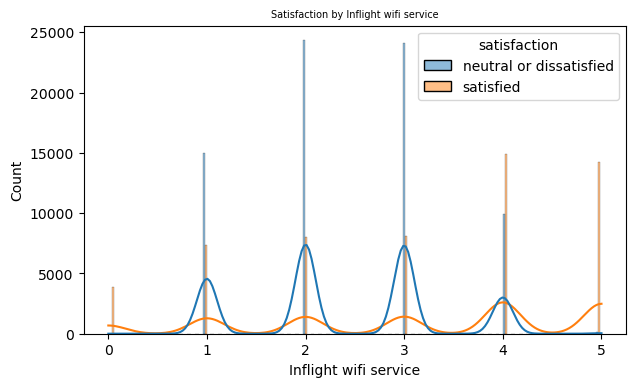

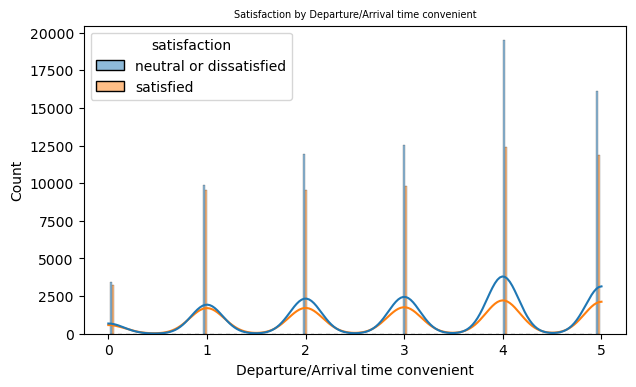

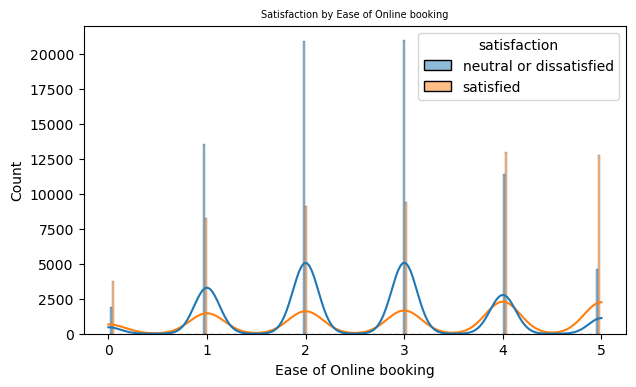

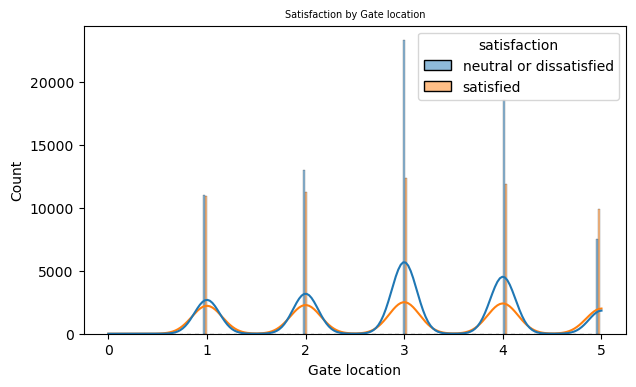

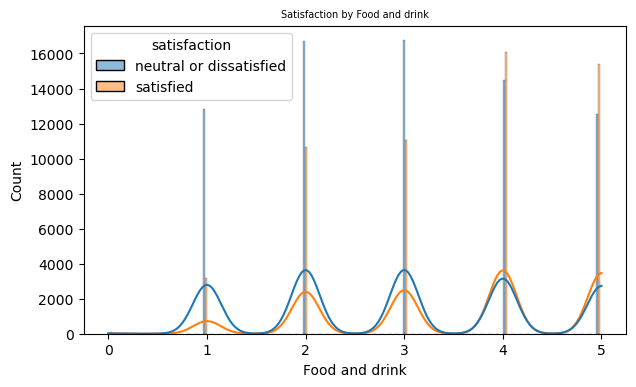

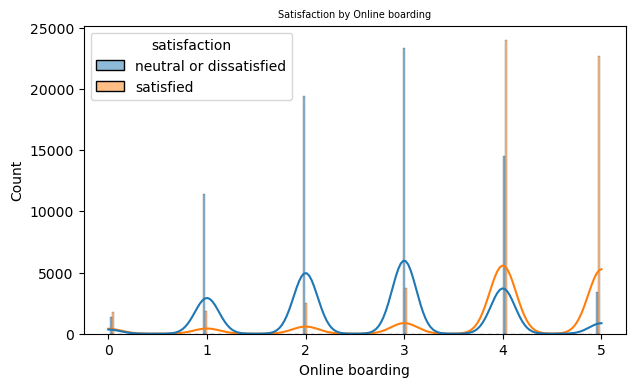

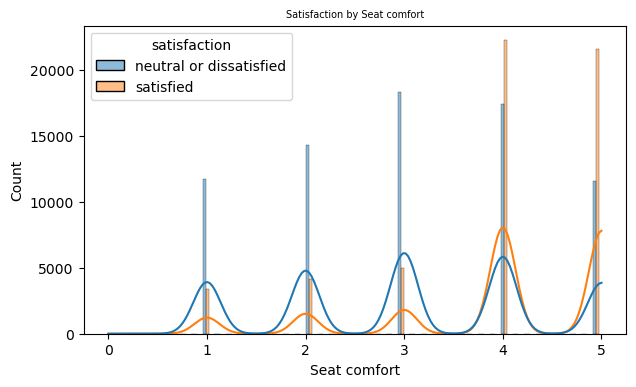

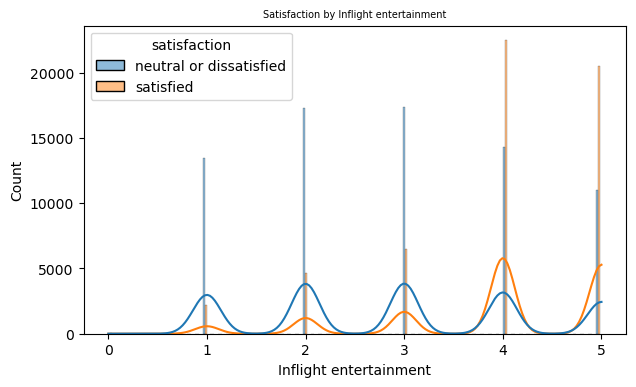

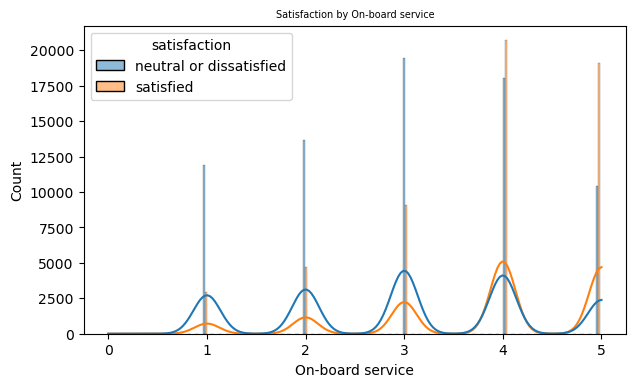

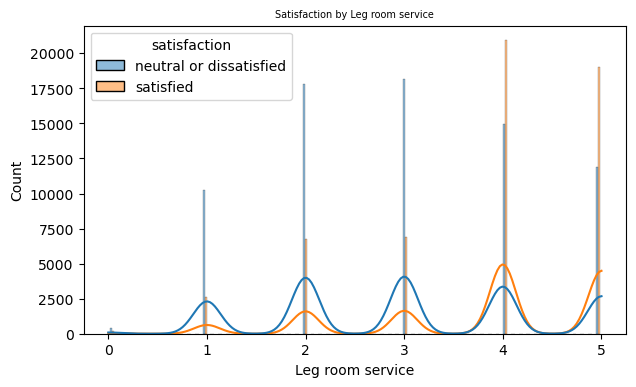

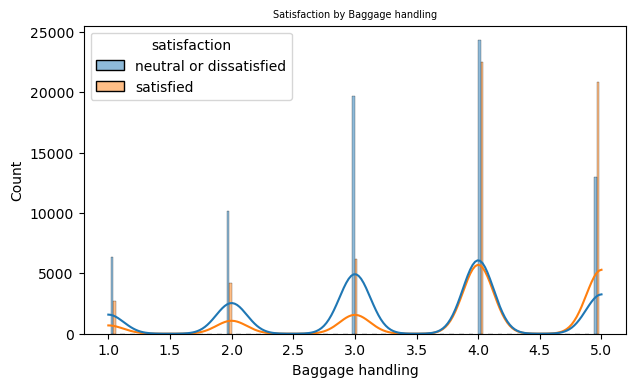

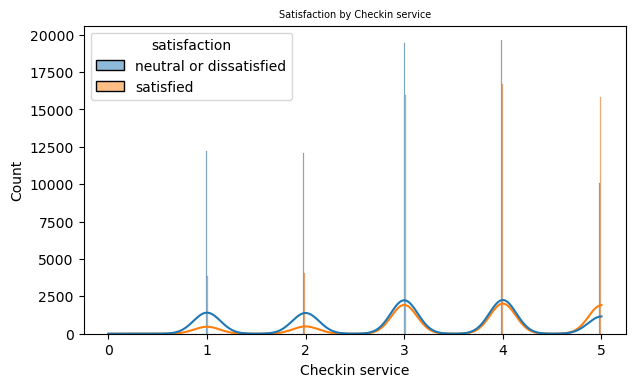

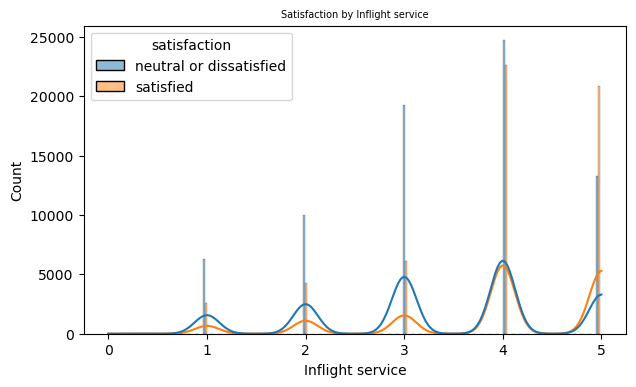

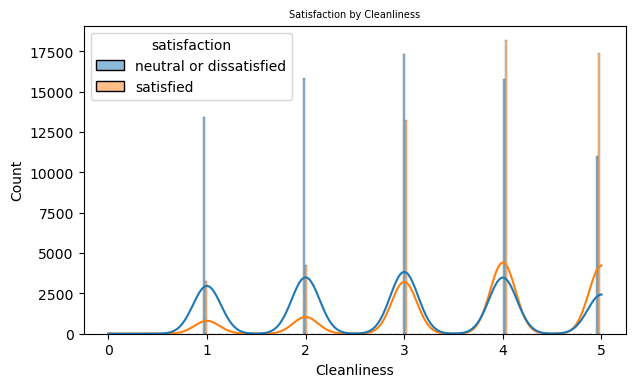

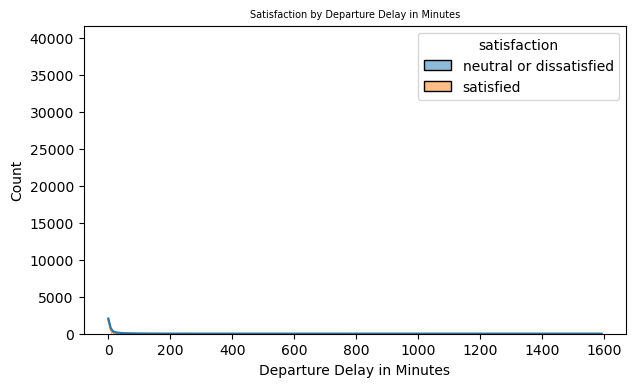

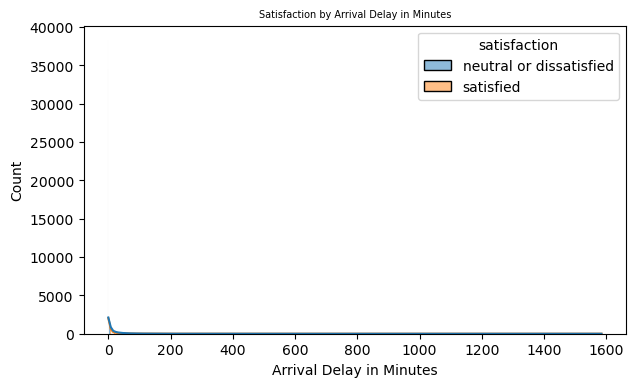

In [21]:
for col in numerikal:
    plt.figure(figsize = (7,4))
    sns.histplot(data = df, x = col, hue = 'satisfaction', multiple = 'dodge', shrink = 0.5, kde = True)
    plt.title(f"Satisfaction by {col}", fontsize = 7)
    plt.show()

### Modeling

In [23]:
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler

In [24]:
x = df.drop('satisfaction', axis = 1)
y = df['satisfaction'].copy()
y = pd.DataFrame(y)

In [25]:
LE = LabelEncoder()

x['Gender'] = LE.fit_transform(x['Gender'])
print("Gender")
print(LE.classes_)
print(np.sort(x['Gender'].unique()))
print('')

x['Customer Type'] = LE.fit_transform(x['Customer Type'])
print("Customer Type")
print(LE.classes_)
print(np.sort(x['Customer Type'].unique()))
print('')

x['Type of Travel'] = LE.fit_transform(x['Type of Travel'])
print("Type of Travel")
print(LE.classes_)
print(np.sort(x['Type of Travel'].unique()))
print('')

x['Class'] = LE.fit_transform(x['Class'])
print("Class")
print(LE.classes_)
print(np.sort(x['Class'].unique()))
print('')

Gender
['Female' 'Male']
[0 1]

Customer Type
['Loyal Customer' 'disloyal Customer']
[0 1]

Type of Travel
['Business travel' 'Personal Travel']
[0 1]

Class
['Business' 'Eco' 'Eco Plus']
[0 1 2]



In [26]:
x

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,70172,1,0,13,1,2,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0
1,5047,1,1,25,0,0,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0
2,110028,0,0,26,0,0,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0
3,24026,0,0,25,0,0,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0
4,119299,1,0,61,0,0,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,78463,1,1,34,0,0,526,3,3,3,1,4,3,4,4,3,2,4,4,5,4,0,0.0
129876,71167,1,0,23,0,0,646,4,4,4,4,4,4,4,4,4,5,5,5,5,4,0,0.0
129877,37675,0,0,17,1,1,828,2,5,1,5,2,1,2,2,4,3,4,5,4,2,0,0.0
129878,90086,1,0,14,0,0,1127,3,3,3,3,4,4,4,4,3,2,5,4,5,4,0,0.0


In [27]:
y

,satisfaction
0,neutral or dissatisfied
1,neutral or dissatisfied
2,satisfied
3,neutral or dissatisfied
4,satisfied
...,...
129875,neutral or dissatisfied
129876,satisfied
129877,neutral or dissatisfied
129878,satisfied


In [28]:
y['satisfaction'] = LE.fit_transform(y['satisfaction'])
print("Class")
print(LE.classes_)
print(np.sort(y['satisfaction'].unique()))
print('')

Class
['neutral or dissatisfied' 'satisfied']
[0 1]



In [29]:
ss = StandardScaler()

for numerik in numerikal:
    x[numerik] = ss.fit_transform(df[numerik].values.reshape(-1,1))

In [30]:
x = x.drop('id', axis = 1)
x.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,1,0,-1.747961,1,2,-0.732184,0.204090,0.617265,0.173445,-1.546267,1.349867,-0.187037,1.181428,1.230787,0.479357,-0.266574,0.311762,0.547894,1.153946,1.304487,0.270187,0.075738
1,1,1,-0.954274,0,0,-0.957760,0.204090,-0.692719,0.173445,0.018048,-1.657814,-0.187037,-1.850520,-1.767616,-1.851475,1.252898,-0.535681,-1.821437,0.304086,-1.740402,-0.360214,-0.236703
2,0,0,-0.888133,0,0,-0.048440,-0.548166,-0.692719,-0.539957,-0.764109,1.349867,1.293662,1.181428,1.230787,0.479357,-0.266574,0.311762,0.547894,0.304086,1.304487,-0.386481,-0.392924
3,0,0,-0.954274,0,0,-0.629924,-0.548166,1.272257,1.600249,1.582364,-0.905894,-0.927386,-1.092533,-1.018015,-1.074531,1.252898,-0.535681,-1.821437,0.304086,-0.979180,-0.097547,-0.158593
4,1,0,1.426788,0,0,-0.978814,0.204090,-0.037727,0.173445,0.018048,0.597947,1.293662,1.181428,-0.268414,-0.297587,0.493162,0.311762,-0.241883,-0.545774,-0.217958,-0.386481,-0.392924


In [31]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [32]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [33]:
from sklearn.feature_selection import SelectKBest, f_classif
import lazypredict
from lazypredict.Supervised import LazyClassifier

# Feature Selection
selector = SelectKBest(score_func = f_classif, k = 4)

x_selected = selector.fit_transform(x,y)

selected_feature_indices = selector.get_support(indices = True)

selected_feature_names = x.columns[selected_feature_indices]

print("Selected Feature : ")
print(selected_feature_names)

Selected Feature : 
Index(['Type of Travel', 'Class', 'Online boarding', 'Inflight entertainment'], dtype='object')


Menurut model SelectKBest, fitur paling berpengaruh untuk Airline Passenger Satisfaction adalah 'Type of Travel', 'Class', 'Online boarding', 'Inflight entertainment'.

In [34]:
def make_results(model_name:str, model_object, metric:str):
    '''
    Arguments:
        model_name (string): what you want the model to be called in the output table
        model_object: a fit GridSearchCV object
        metric (string): precision, recall, f1, accuracy, or auc

    Returns a pandas df with the F1, recall, precision, accuracy, and auc scores
    for the model with the best mean 'metric' score across all validation folds.
    '''

    # Create dictionary that maps input metric to actual metric name in GridSearchCV
    metric_dict = {'auc': 'mean_test_roc_auc',
                   'precision': 'mean_test_precision',
                   'recall': 'mean_test_recall',
                   'f1': 'mean_test_f1',
                   'accuracy': 'mean_test_accuracy'
                  }

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(metric) score
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]

    # Extract Accuracy, precision, recall, and f1 score from that row
    auc = best_estimator_results.mean_test_roc_auc
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy

    # Create table of results
    table = pd.DataFrame()
    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision],
                          'recall': [recall],
                          'F1': [f1],
                          'accuracy': [accuracy],
                          'auc': [auc]
                        })

    return table

In [35]:
  def get_scores(model_name:str, model, X_test_data, y_test_data):
      '''
      Generate a table of test scores.

      In:
          model_name (string):  How you want your model to be named in the output table
          model:                A fit GridSearchCV object
          X_test_data:          numpy array of X_test data
          y_test_data:          numpy array of y_test data

      Out: pandas df of precision, recall, f1, accuracy, and AUC scores for your model
      '''

      preds = model.best_estimator_.predict(X_test_data)

      auc = roc_auc_score(y_test_data, preds)
      accuracy = accuracy_score(y_test_data, preds)
      precision = precision_score(y_test_data, preds)
      recall = recall_score(y_test_data, preds)
      f1 = f1_score(y_test_data, preds)

      table = pd.DataFrame({'model': [model_name],
                            'precision': [precision],
                            'recall': [recall],
                            'f1': [f1],
                            'accuracy': [accuracy],
                            'AUC': [auc]
                          })

      return table

In [36]:
clf = LazyClassifier(verbose = 0, ignore_warnings = True, custom_metric = None)
models, predictions = clf.fit(x_train, x_test, y_train, y_test)

models.reset_index()

 97%|█████████▋| 28/29 [23:54<00:50, 50.65s/it] 

[LightGBM] [Info] Number of positive: 45109, number of negative: 58795
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003440 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 948
[LightGBM] [Info] Number of data points in the train set: 103904, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.434141 -> initscore=-0.264975
[LightGBM] [Info] Start training from score -0.264975


100%|██████████| 29/29 [23:55<00:00, 49.48s/it]


,Model,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
0,XGBClassifier,0.96,0.96,0.96,0.96,3.58
1,LGBMClassifier,0.96,0.96,0.96,0.96,1.01
2,RandomForestClassifier,0.96,0.96,0.96,0.96,11.50
3,ExtraTreesClassifier,0.96,0.96,0.96,0.96,11.20
4,BaggingClassifier,0.96,0.96,0.96,0.96,4.10
5,SVC,0.95,0.95,0.95,0.95,245.52
6,DecisionTreeClassifier,0.95,0.95,0.95,0.95,0.70
7,AdaBoostClassifier,0.93,0.92,0.92,0.93,4.11
8,KNeighborsClassifier,0.93,0.92,0.92,0.93,4.04
9,ExtraTreeClassifier,0.92,0.92,0.92,0.92,0.20


LazyClassifier untuk secara cepat mengevaluasi beberapa model Machine Learning pada dataset yang diberikan. LazyClassifier adalah pustaka yang menyediakan antarmuka sederhana untuk menguji berbagai model klasifikasi dengan kode minimal.

Dikarenakan hasil dari LazyClassifier yang tertinggi adalah XGBClassifier, maka dalam modelling ini saya menggunakan model XGBClassifier

In [38]:
xgb = XGBClassifier()

### XGB Classifier()

In [39]:
xgb_params = {'max_depth':[4, 6, 8, None],
             'learning_rate': [0.2, 0.3],
             'n_estimators': [50, 75, 100],
              'min_child_weight' : [2,4]}
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}
xgb_cv = GridSearchCV(xgb, xgb_params, scoring = scoring, cv = 5, refit= 'accuracy')

In [40]:
%%time
xgb_cv.fit(x_train, y_train)

CPU times: total: 52min 57s
Wall time: 9min 36s


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.2, 0.3],
                         'max_depth': [4, 6, 8, None],
                         'min_child_weight': [2, 4],
                         'n_estimators': [50, 75, 100]},
             refit='accuracy',
             scoring={'recall', 'roc_auc', 'accuracy', 'precision', 'f1'})

In [41]:
print("Accuracy Score Data Training :", xgb_cv.score(x_train, y_train))
print("Accuracy Score Data Testing :", xgb_cv.score(x_test, y_test))

Accuracy Score Data Training : 0.9808765783800432
Accuracy Score Data Testing : 0.9641207268247614


In [42]:
xgb_cv.best_params_

{'learning_rate': 0.2,
 'max_depth': 8,
 'min_child_weight': 2,
 'n_estimators': 100}

In [43]:
xgb_cv.best_score_

0.9643420849883281

In [47]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, ConfusionMatrixDisplay
from sklearn.metrics import roc_auc_score, roc_curve

In [49]:
xgb_cv_result = make_results('XGB Classifier', xgb_cv, 'accuracy')
xgb_cv_result

,model,precision,recall,F1,accuracy,auc
0,XGB Classifier,0.97,0.94,0.96,0.96,1.00


In [48]:
xgb_cv_getscore = get_scores('XGB Classifier', xgb_cv, x_test, y_test)
xgb_cv_getscore

,model,precision,recall,f1,accuracy,AUC
0,XGB Classifier,0.97,0.94,0.96,0.96,0.96


In [58]:
y_pred = xgb_cv.best_estimator_.predict(x_test)

In [59]:
xgb_cv_cr = classification_report(y_test, y_pred)
print(xgb_cv_cr)

              precision    recall  f1-score   support

           0       0.96      0.98      0.97     14657
           1       0.97      0.94      0.96     11319

    accuracy                           0.96     25976
   macro avg       0.97      0.96      0.96     25976
weighted avg       0.96      0.96      0.96     25976



In [60]:
auc_xgb_cv = roc_auc_score(y_test, y_pred)
print(auc_xgb_cv)

0.961838261433217


In [61]:
accuracy_xgb_cv = accuracy_score(y_test, y_pred)
print(accuracy_xgb_cv)

0.9641207268247614


[[14358   299]
 [  633 10686]]


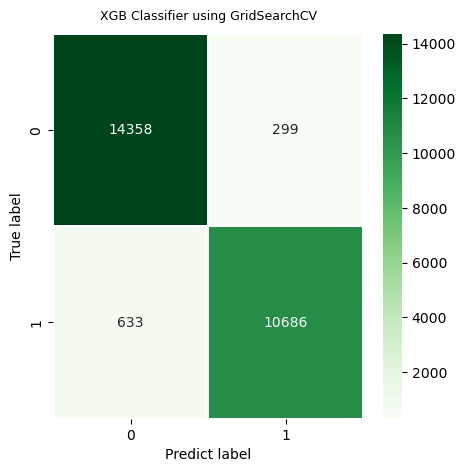

In [63]:
xgb_cv_pred = xgb_cv.best_estimator_.predict(x_test)
xgb_cv_cm = confusion_matrix(y_test, xgb_cv_pred)

plt.figure(figsize = (5,5))
sns.heatmap(xgb_cv_cm, annot=True, linewidth = 0.3, cmap = "Greens", fmt = 'g')
plt.title("XGB Classifier using GridSearchCV", fontsize = 9, pad = 10)
plt.xlabel("Predict label")
plt.ylabel("True label")
plt.show()

In [62]:
xgb_cv_features = pd.DataFrame(xgb_cv.best_estimator_.feature_importances_,
                              columns=['Feature_importances'],
                              index=x_train.columns)

xgb_cv_features = xgb_cv_features.sort_values(by='Feature_importances', ascending=False)
xgb_cv_features

,Feature_importances
Online boarding,0.44
Type of Travel,0.16
Inflight wifi service,0.11
Customer Type,0.06
Inflight entertainment,0.04
Class,0.03
Checkin service,0.02
Cleanliness,0.02
Gate location,0.02
Seat comfort,0.02


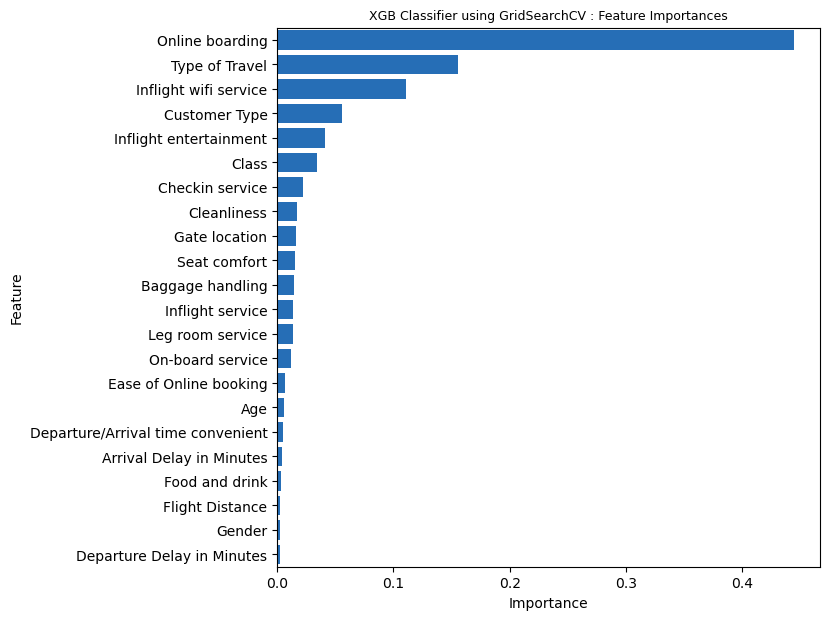

In [68]:
plt.figure(figsize=(7,7))
sns.barplot(data=xgb_cv_features, x="Feature_importances", y=xgb_cv_features.index, orient='h', color = '#0E6ECE')
plt.title("XGB Classifier using GridSearchCV : Feature Importances", fontsize=9)
plt.ylabel("Feature")
plt.xlabel("Importance")
plt.show()

dari barplot diatas menunjukkan bahwa dari hasil model XGBoost menunjukkan bahwa, "online boarding",
"type of travel", "Inflight wifi service" memiliki kepentingan paling tinggi dalam urutan tersebut.

### Kesimpulan dan rekomendasi

Dari hasil ketiga model diatas menunjukkan bahwa variable paling penting yang mempengaruhi kepuasan pelanggan adalah "online boarding", "type of travel", "Inflight wifi service".
untuk dapat mempertahankan pelanggan, beberapa rekomendasi dapat disampaikan kepada stakeholders:
- Perbaiki sistem "Online Boarding" dari segi database, server, pengalaman pengguna baik website ataupun aplikasi mobile. perbaiki tampilannya juga bila diperlukan.
- Menyelidiki apakah adanya bug didalam website, server, database, aplikasi sehingga membuat pelanggan merasa tidak nyaman ketika melakukan online boarding.
- Perbaiki layanan wifi saya pesawat berada diatas, karena layanan wifi dapat membuat pelanggan merasa nyaman, tidak bosan saat perjalanan panjang. ini akan membuat pelanggan juga merasa senang ketika perjalanan panjang.
- untuk type of travel, kalau melihat dari insight/informasi grafik diatas (EDA) menunjukkan bahwa pada Personal Travel memiliki ketidakpuasan yang sangat tinggi. mungkin bisa diperbaiki dari segi pelayanan yang diberikan kepada Personal Travel. seperti, ruang tunggu, pelayanan crew, pelayanan checkin pada personal travel.

In [65]:
df.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.00,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.00,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.00,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.00,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.00,satisfied


In [66]:
df.to_csv('airline_passenger_satisfaction_new.csv', index = False)